In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import os

In [2]:
# 1. LOAD DATA
df = pd.read_csv('cubic_zirconia.csv') 

In [3]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [5]:
df.nunique()

Unnamed: 0    26967
carat           257
cut               5
color             7
clarity           8
depth           169
table           112
x               531
y               526
z               356
price          8742
dtype: int64

In [6]:
lr_df = df.drop('Unnamed: 0', axis=1)
lr_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [7]:
lr_df.shape

(26967, 10)

In [8]:
zero_dimension_rows = lr_df[(lr_df['x'] == 0) | (lr_df['y'] == 0) | (lr_df['z'] == 0)]

print("Number of rows with at least one zero dimension:", zero_dimension_rows.shape[0])
zero_dimension_rows


Number of rows with at least one zero dimension: 9


,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [9]:
print("Number of x = 0 :", (lr_df['x'] == 0).sum())
print("Number of y = 0 :", (lr_df['y'] == 0).sum())
print("Number of z = 0 :", (lr_df['z'] == 0).sum())


Number of x = 0 : 3
Number of y = 0 : 3
Number of z = 0 : 9


In [10]:
#Dropping dimentionless diamonds
lr_df = lr_df.drop(lr_df[lr_df["x"]==0].index)
lr_df = lr_df.drop(lr_df[lr_df["y"]==0].index)
lr_df = lr_df.drop(lr_df[lr_df["z"]==0].index)
lr_df.shape

(26958, 10)

In [11]:
# Print all fully duplicated rows (entire row identical)
duplicated_rows = lr_df[lr_df.duplicated(keep=False)]

print("All duplicated rows (entire row identical):")
print(duplicated_rows)



All duplicated rows (entire row identical):
       carat        cut color clarity  depth  table     x     y     z  price
106     1.00    Premium     F    VVS2   60.6   54.0  6.56  6.52  3.96   8924
423     0.35    Premium     J     VS1   62.4   58.0  5.67  5.64  3.53    949
1996    1.50    Premium     F     SI2   58.5   60.0  7.52  7.48  4.39   7644
2007    1.52       Good     E      I1   57.3   58.0  7.53  7.42  4.28   3105
2155    0.35      Ideal     F     VS2   61.4   54.0  4.58  4.54  2.80    906
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
25268   1.20    Premium     I     VS2   62.6   58.0  6.77  6.72  4.22   5699
25759   0.30      Ideal     G      IF   62.1   55.0  4.32  4.35  2.69    863
25941   0.51    Premium     F     SI2   58.1   59.0  5.26  5.24  3.05   1052
26191   2.54  Very Good     H     SI2   63.5   56.0  8.68  8.65  5.50  16353
26530   0.41      Ideal     G      IF   61.7   56.0  4.77  4.80  2.95   1367

[64 rows x 10 columns]


In [12]:
lr_df = lr_df.drop_duplicates()

print("Dataset shape after removing duplicates:", lr_df.shape)


Dataset shape after removing duplicates: (26925, 10)


In [13]:
print('cut\n',lr_df.cut.value_counts())
print('\n')
print('color\n',lr_df.color.value_counts())
print('\n')
print('clarity\n',lr_df.clarity.value_counts())
print('\n')

cut
 cut
Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: count, dtype: int64


color
 color
G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: count, dtype: int64


clarity
 clarity
SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: count, dtype: int64




In [14]:
# Missing value count
missing_count = lr_df.isnull().sum()

# Missing value percentage
missing_percentage = (lr_df.isnull().sum() / len(lr_df)) * 100

# Combine into one table
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percentage
})

print(missing_summary)


         Missing Count  Missing Percentage (%)
carat                0                0.000000
cut                  0                0.000000
color                0                0.000000
clarity              0                0.000000
depth              697                2.588672
table                0                0.000000
x                    0                0.000000
y                    0                0.000000
z                    0                0.000000
price                0                0.000000


In [15]:
# Drop rows with any missing values
lr_df = lr_df.dropna()

# Verify
lr_df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [16]:
lr_df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [17]:
import numpy as np

# 1. Volume
lr_df['volume'] = lr_df['x'] * lr_df['y'] * lr_df['z']

# 2. Average girdle diameter
lr_df['avg_girdle_diameter'] = (lr_df['x'] + lr_df['y']) / 2

# 3. Average table diameter
lr_df['avg_table_diameter'] = (lr_df['table'] * lr_df['avg_girdle_diameter']) / 100

# 4. Density
# Note: This will result in infinity if volume is 0
lr_df['density'] = lr_df['carat'] / lr_df['volume']

# 5. Length to width ratio
# Using numpy to handle element-wise maximum and minimum comparison
lr_df['length2width_ratio'] = np.maximum(lr_df['x'], lr_df['y']) / np.minimum(lr_df['x'], lr_df['y'])

# check the results
print(lr_df.head())

   carat        cut color clarity  depth  table     x     y     z  price  \
0   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499   
1   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984   
2   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289   
3   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082   
4   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779   

       volume  avg_girdle_diameter  avg_table_diameter   density  \
0   48.726678                 4.28              2.4824  0.006157   
1   53.225640                 4.44              2.5752  0.006200   
2  139.726944                 6.08              3.6480  0.006441   
3   68.482560                 4.81              2.6936  0.006133   
4   51.066825                 4.39              2.5901  0.006070   

   length2width_ratio  
0            1.004684  
1            1.009050  
2            1.013245  
3            1.004167  
4            1

In [18]:
import numpy as np

# Overwrite the 'price' column with its log-transformed values
lr_df['price'] = np.log(lr_df['price'])

# Verify the change
print(lr_df['price'].head())

0    6.212606
1    6.891626
2    8.746557
3    6.986566
4    6.658011
Name: price, dtype: float64


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- 1. Define your columns ---
num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 
            'avg_girdle_diameter', 'avg_table_diameter', 'density', 'length2width_ratio']
cat_cols = ['cut', 'color', 'clarity']

# --- 2. Define the Order for Ordinal Variables ---
# (Worst to Best)
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# --- 3. Separate features and target ---
# We generally do NOT include Price in the clustering data (X)
X = lr_df.drop('price', axis=1) 
y = lr_df['price']

# --- 4. Define the Preprocessing Pipeline ---
# We use pipelines to chain steps: Encode -> Then Scale
cat_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(categories=[cut_order, color_order, clarity_order])),
    ('scaler', StandardScaler()) # Scale the categories (0-7) so they match the numericals
])

num_pipeline = Pipeline([
    ('scaler', StandardScaler()) # Switched to StandardScaler to fix "1 cluster" issue
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ],
    verbose_feature_names_out=False
)

# --- 5. Apply preprocessing ---
# This results in a numpy array where ALL columns are scaled
X_processed = preprocessor.fit_transform(X)

# --- 6. Convert back to DataFrame ---
X_processed_df = pd.DataFrame(X_processed, columns=preprocessor.get_feature_names_out())

# Note: Do NOT add 'price' back if you are about to run Clustering.
# X_processed_df is now ready for KMeans.fit()

print("Processing complete. Data is scaled and ordered correctly.")
print(X_processed_df.head())



Processing complete. Data is scaled and ordered correctly.
      carat     depth     table         x         y         z    volume  \
0 -1.043860  0.251046  0.244301 -1.296622 -1.239281 -1.260719 -1.011921   
1 -0.980904 -0.669766  0.244301 -1.163287 -1.093235 -1.203245 -0.955829   
2  0.215256  0.321878  1.141174  0.276727  0.332867  0.348556  0.122647   
3 -0.792037 -0.103112 -0.652572 -0.807728 -0.801142 -0.829663 -0.765609   
4 -1.022874 -0.953093  0.692737 -1.225510 -1.119008 -1.275087 -0.982744   

   avg_girdle_diameter  avg_table_diameter   density  length2width_ratio  \
0            -1.279825           -1.182790  0.153006           -0.094275   
1            -1.138663           -1.048110  0.376389            0.016047   
2             0.308253            0.508832  1.622368            0.122056   
3            -0.812224           -0.876278  0.029794           -0.107343   
4            -1.182776           -1.026486 -0.293030            0.252083   

        cut     color   clarity  

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
# Split X and y into training and test set in 80:20 ratio

In [20]:

X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.20, random_state=1)


print("--- Data Split Complete For X ---")
print(f"Training set shape: {X_train.shape} (80%)")
print(f"Testing set shape:  {X_test.shape} (20%)")

print("--- Data Split Complete For y ---")
print(f"Training set shape: {y_train.shape} (80%)")
print(f"Testing set shape:  {y_test.shape} (20%)")

X_train.head(5)




--- Data Split Complete For X ---
Training set shape: (20982, 14) (80%)
Testing set shape:  (5246, 14) (20%)
--- Data Split Complete For y ---
Training set shape: (20982,) (80%)
Testing set shape:  (5246,) (20%)


,carat,depth,table,x,y,z,volume,avg_girdle_diameter,avg_table_diameter,density,length2width_ratio,cut,color,clarity
8825,-0.771051,-0.103112,0.692737,-0.798839,-0.741005,-0.786558,-0.742563,-0.776934,-0.632607,-0.068433,-0.003365,-0.817760,0.352438,-0.641184
32,-0.057553,-0.669766,-0.652572,0.196726,0.143866,0.089922,-0.043784,0.171502,0.029907,-0.177507,0.001512,0.080670,0.939044,0.572950
11793,-0.204449,-0.032280,-1.101008,-0.007720,0.023592,0.003711,-0.165281,0.008283,-0.203751,-0.648300,-0.035925,0.979099,0.352438,0.572950
3339,0.634961,-1.590578,0.692737,0.925622,0.831144,0.679032,0.648320,0.886137,0.981444,-0.411121,0.051372,0.080670,0.352438,-0.641184
25462,2.544619,-1.165588,1.589610,2.143412,1.999516,1.914724,2.364171,2.090430,2.385348,0.845637,0.038177,0.080670,-0.820775,-0.034117


In [21]:
y_train.head(5)

9071     6.674561
33       8.089482
12132    8.056427
3437     8.669227
26185    9.744961
Name: price, dtype: float64

Calculating optimal k (this may take a moment)...
k=2: Silhouette Score = 0.3568
k=3: Silhouette Score = 0.3572
k=4: Silhouette Score = 0.2732
k=5: Silhouette Score = 0.2568
k=6: Silhouette Score = 0.1845
k=7: Silhouette Score = 0.1828
k=8: Silhouette Score = 0.1832
k=9: Silhouette Score = 0.1723
k=10: Silhouette Score = 0.1565

OPTIMAL NUMBER OF CLUSTERS: k = 3
Highest Silhouette Score: 0.3572


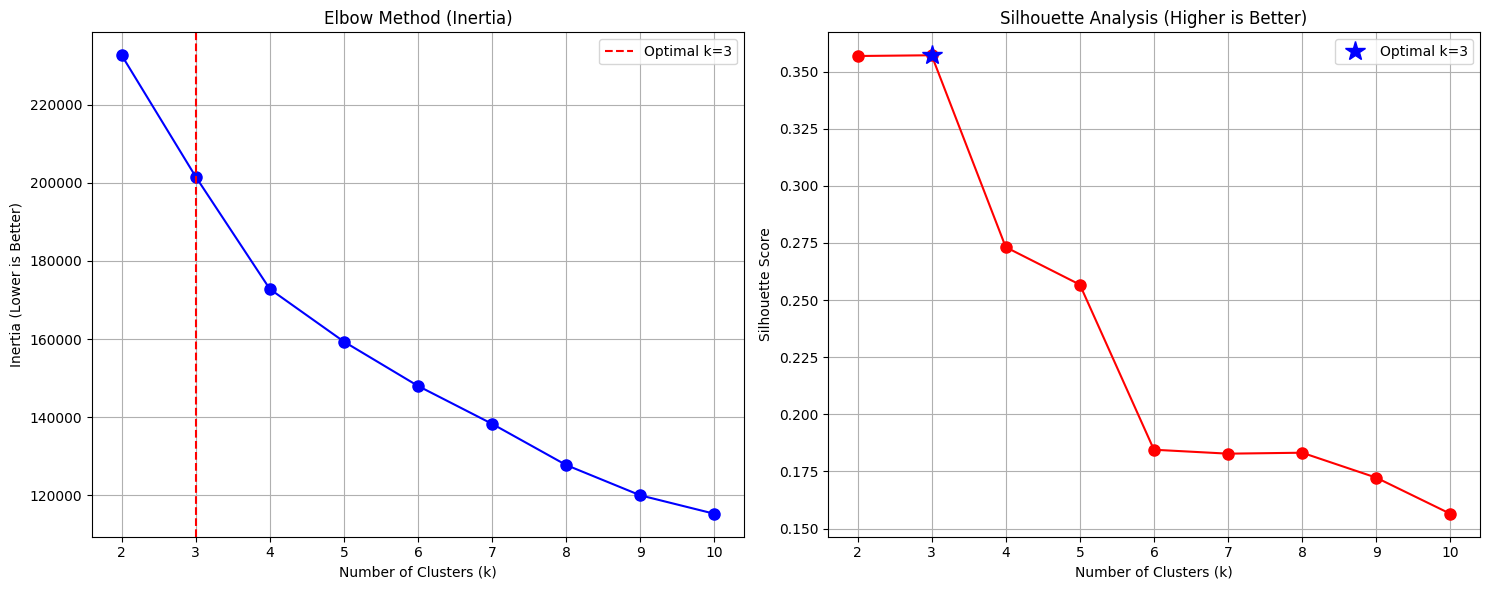

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- 1. Setup Storage ---
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Checking k=2 to k=10

print("Calculating optimal k (this may take a moment)...")

# --- 2. Loop through K values ---
for k in K_range:
    # Initialize and Fit
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed_df)  # Make sure to use your PROCESSED (Scaled) data
    
    # Store Inertia (Elbow Method)
    inertia.append(kmeans.inertia_)
    
    # Store Silhouette Score
    # Note: If dataset is huge (>50k rows), sample it for speed:
    # score = silhouette_score(X_processed_df.sample(5000), kmeans.predict(X_processed_df.sample(5000)))
    score = silhouette_score(X_processed_df, kmeans.labels_)
    silhouette_scores.append(score)
    
    print(f"k={k}: Silhouette Score = {score:.4f}")

# --- 3. Determine Optimal K Mathematically ---
# We pick the k with the HIGHEST Silhouette Score
best_score = max(silhouette_scores)
best_k = K_range[silhouette_scores.index(best_score)]

print("\n" + "="*40)
print(f"OPTIMAL NUMBER OF CLUSTERS: k = {best_k}")
print(f"Highest Silhouette Score: {best_score:.4f}")
print("="*40)

# --- 4. Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Elbow Method
ax1.plot(K_range, inertia, 'bo-', markersize=8)
# Mark the "Best K" on this plot too for reference
ax1.axvline(x=best_k, color='r', linestyle='--', label=f'Optimal k={best_k}')
ax1.set_title('Elbow Method (Inertia)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Lower is Better)')
ax1.legend()
ax1.grid(True)

# Plot 2: Silhouette Analysis
ax2.plot(K_range, silhouette_scores, 'ro-', markersize=8)
# Highlight the max point
ax2.plot(best_k, best_score, 'b*', markersize=15, label=f'Optimal k={best_k}')
ax2.set_title('Silhouette Analysis (Higher is Better)')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
from sklearn.cluster import KMeans

# --- 1. Initialize KMeans with k=3 ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# --- 2. Fit the model directly on X_train ---
# (Assumes X_train is the numeric/prepared data you want to use)
kmeans.fit(X_train)

# --- 3. Assign the cluster labels back to X_train ---
X_train['cluster'] = kmeans.labels_

# --- 4. Verify Results ---
print("First 5 rows of X_train with clusters:")
print(X_train.head())

print("\nCluster Distribution:")
print(X_train['cluster'].value_counts())

First 5 rows of X_train with clusters:
          carat     depth     table         x         y         z    volume  \
8825  -0.771051 -0.103112  0.692737 -0.798839 -0.741005 -0.786558 -0.742563   
32    -0.057553 -0.669766 -0.652572  0.196726  0.143866  0.089922 -0.043784   
11793 -0.204449 -0.032280 -1.101008 -0.007720  0.023592  0.003711 -0.165281   
3339   0.634961 -1.590578  0.692737  0.925622  0.831144  0.679032  0.648320   
25462  2.544619 -1.165588  1.589610  2.143412  1.999516  1.914724  2.364171   

       avg_girdle_diameter  avg_table_diameter   density  length2width_ratio  \
8825             -0.776934           -0.632607 -0.068433           -0.003365   
32                0.171502            0.029907 -0.177507            0.001512   
11793             0.008283           -0.203751 -0.648300           -0.035925   
3339              0.886137            0.981444 -0.411121            0.051372   
25462             2.090430            2.385348  0.845637            0.038177   

     

In [24]:
# --- 1. Predict Clusters for X_test ---
# Use the trained 'kmeans' model from the previous step
test_labels = kmeans.predict(X_test)

# --- 2. Assign the cluster labels to X_test ---
X_test['cluster'] = test_labels


# --- 4. Verify Results ---
print("First 5 rows of X_train with clusters:")
print(X_test.head())

# --- 3. Print Count for Each Cluster in Test Set ---
print("Number of observations in each cluster (Test Set):")
print(X_test['cluster'].value_counts())



First 5 rows of X_train with clusters:
          carat     depth     table         x         y         z    volume  \
16436 -1.022874  1.030195 -1.101008 -1.261066 -1.204917 -1.160139 -0.984225   
2074  -0.687110 -0.315607 -0.652572 -0.621059 -0.586367 -0.642872 -0.640831   
20437 -0.603169  0.109383 -0.652572 -0.541059 -0.491866 -0.513556 -0.571979   
23372 -0.372331  0.109383 -1.549444 -0.221056 -0.199773 -0.197448 -0.341788   
7659  -1.043860  1.242690  0.244301 -1.332178 -1.222099 -1.188876 -1.003441   

       avg_girdle_diameter  avg_table_diameter   density  length2width_ratio  \
16436            -1.244535           -1.337207 -0.219916           -0.095373   
2074             -0.609303           -0.689352 -0.719364           -0.112157   
20437            -0.521077           -0.608080 -0.292990           -0.015218   
23372            -0.212284           -0.482979 -0.397829           -0.120408   
7659             -1.288648           -1.191207 -0.284976            0.265266   

     

Model Building


Multiple Linear


In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# PLACEHOLDERS: Replace these filenames with your actual files
# X_test = pd.read_csv('X_test.csv')
# y_train = pd.read_csv('y_train.csv')
# y_test = pd.read_csv('y_test.csv')

# --- 2. Cluster Analysis (k=3) ---
print("Running Clustering...")
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit on Train and Predict Cluster Labels
X_train['cluster'] = kmeans.fit_predict(X_train)

# Predict Cluster Labels for Test (using the same model trained on X_train)
# Note: We do NOT fit on test, only predict
X_test['cluster'] = kmeans.predict(X_test)

# --- 3. Preprocessing for Regression ---
# One-hot encode the 'cluster' column (treating it as categorical)
X_train_encoded = pd.get_dummies(X_train, columns=['cluster'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['cluster'], drop_first=True)

# Align columns to ensure both have the same dummy variables
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# --- 4. Linear Regression ---
print("Fitting Regression Model...")
reg_model = LinearRegression()
reg_model.fit(X_train_encoded, y_train)

# --- 5. Evaluation ---

# Predict on Train set
y_train_pred = reg_model.predict(X_train_encoded)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict on Test set
y_test_pred = reg_model.predict(X_test_encoded)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# --- 6. Output Results ---
print("\n" + "="*30)
print("     MODEL PERFORMANCE")
print("="*30)
print(f"Training Set R^2 : {r2_train:.4f}")
print(f"Training Set RMSE: {rmse_train:.4f}")
print("-" * 30)
print(f"Test Set R^2     : {r2_test:.4f}")
print(f"Test Set RMSE    : {rmse_test:.4f}")
print("="*30)

Running Clustering...
Fitting Regression Model...

     MODEL PERFORMANCE
Training Set R^2 : 0.9813
Training Set RMSE: 0.1395
------------------------------
Test Set R^2     : 0.9810
Test Set RMSE    : 0.1399


Ridge

In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error



# --- 2. Cluster Analysis (k=3) ---
print("Running Clustering...")
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit on Train and Predict Cluster Labels
X_train['cluster'] = kmeans.fit_predict(X_train)

# Predict Cluster Labels for Test
X_test['cluster'] = kmeans.predict(X_test)

# --- 3. Preprocessing for Regression ---
# One-hot encode the 'cluster' column
X_train_encoded = pd.get_dummies(X_train, columns=['cluster'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['cluster'], drop_first=True)

# Align columns to ensure both have the same dummy variables
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# --- 4. Ridge Regression with Automatic Alpha Search ---
print("Fitting Ridge Regression Model (scanning for optimal alpha)...")

# Generate 100 alpha values logarithmically spaced between 1e-6 (0.000001) and 1e6 (1000000)
# This covers a huge range automatically without manual selection.
alphas_generated = np.logspace(-6, 6, 100)

# Initialize RidgeCV with the generated alphas and 5-fold Cross-Validation
ridge_model = RidgeCV(alphas=alphas_generated, cv=5)
ridge_model.fit(X_train_encoded, y_train)

print(f"Optimal Alpha found: {ridge_model.alpha_:.6f}")

# --- 5. Evaluation ---

# Predict on Train set
y_train_pred = ridge_model.predict(X_train_encoded)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict on Test set
y_test_pred = ridge_model.predict(X_test_encoded)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# --- 6. Output Results ---
print("\n" + "="*30)
print("   RIDGE REGRESSION RESULTS")
print("="*30)
print(f"Training Set R^2 : {r2_train:.4f}")
print(f"Training Set RMSE: {rmse_train:.4f}")
print("-" * 30)
print(f"Test Set R^2     : {r2_test:.4f}")
print(f"Test Set RMSE    : {rmse_test:.4f}")
print("="*30)

Running Clustering...
Fitting Ridge Regression Model (scanning for optimal alpha)...
Optimal Alpha found: 10.722672

   RIDGE REGRESSION RESULTS
Training Set R^2 : 0.9813
Training Set RMSE: 0.1396
------------------------------
Test Set R^2     : 0.9810
Test Set RMSE    : 0.1400


Lasso


In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LassoCV  # Changed from Lasso to LassoCV
from sklearn.metrics import r2_score, mean_squared_error



# --- 2. Cluster Analysis (k=3) ---
print("Running Clustering...")
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
X_train['cluster'] = kmeans.fit_predict(X_train)
X_test['cluster'] = kmeans.predict(X_test)

# --- 3. Preprocessing ---
# One-hot encode the 'cluster' column
X_train_encoded = pd.get_dummies(X_train, columns=['cluster'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['cluster'], drop_first=True)

# Align columns
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# --- 4. Lasso Regression with Cross-Validation ---
print("Fitting Lasso Regression Model (finding optimal alpha)...")

# LassoCV will try 100 different alphas to find the best one
lasso_model = LassoCV(alphas=None, cv=5, random_state=42, max_iter=10000)
lasso_model.fit(X_train_encoded, y_train.values.ravel()) # .ravel() ensures y is 1D array

print(f"Optimal Alpha found: {lasso_model.alpha_:.6f}")

# --- 5. Evaluation ---
# Predict on Train set
y_train_pred = lasso_model.predict(X_train_encoded)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict on Test set
y_test_pred = lasso_model.predict(X_test_encoded)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# --- 6. Output Results ---
print("\n" + "="*30)
print("   LASSO REGRESSION RESULTS")
print("="*30)
print(f"Training Set R^2 : {r2_train:.4f}")
print(f"Training Set RMSE: {rmse_train:.4f}")
print("-" * 30)
print(f"Test Set R^2     : {r2_test:.4f}")
print(f"Test Set RMSE    : {rmse_test:.4f}")
print("="*30)

Running Clustering...
Fitting Lasso Regression Model (finding optimal alpha)...
Optimal Alpha found: 0.000983

   LASSO REGRESSION RESULTS
Training Set R^2 : 0.9810
Training Set RMSE: 0.1405
------------------------------
Test Set R^2     : 0.9807
Test Set RMSE    : 0.1409


Elastic net 

In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error



# --- 2. Cluster Analysis (k=3) ---
print("Running Clustering...")
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit on Train and Predict Cluster Labels
X_train['cluster'] = kmeans.fit_predict(X_train)

# Predict Cluster Labels for Test
X_test['cluster'] = kmeans.predict(X_test)

# --- 3. Preprocessing for Regression ---
# One-hot encode the 'cluster' column
X_train_encoded = pd.get_dummies(X_train, columns=['cluster'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['cluster'], drop_first=True)

# Align columns to ensure both have the same dummy variables
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# --- 4. Elastic Net Regression with Cross-Validation ---
print("Fitting Elastic Net Regression Model (finding optimal alpha and l1_ratio)...")

# Define a list of l1_ratios to test.
# ElasticNetCV will automatically find the best alpha for EACH of these ratios 
# and then select the best combination overall.
l1_ratios_to_test = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1.0]

# Initialize ElasticNetCV
# cv=5 means 5-fold cross-validation
elastic_net_model = ElasticNetCV(l1_ratio=l1_ratios_to_test, cv=5, random_state=42, max_iter=10000)

# Note: .ravel() is used to ensure y_train is a 1D array
elastic_net_model.fit(X_train_encoded, y_train.values.ravel())

print(f"Optimal l1_ratio found: {elastic_net_model.l1_ratio_}")
print(f"Optimal Alpha found:    {elastic_net_model.alpha_:.6f}")

# --- 5. Evaluation ---

# Predict on Train set
y_train_pred = elastic_net_model.predict(X_train_encoded)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict on Test set
y_test_pred = elastic_net_model.predict(X_test_encoded)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# --- 6. Output Results ---
print("\n" + "="*30)
print("  ELASTIC NET RESULTS")
print("="*30)
print(f"Training Set R^2 : {r2_train:.4f}")
print(f"Training Set RMSE: {rmse_train:.4f}")
print("-" * 30)
print(f"Test Set R^2     : {r2_test:.4f}")
print(f"Test Set RMSE    : {rmse_test:.4f}")
print("="*30)

Running Clustering...
Fitting Elastic Net Regression Model (finding optimal alpha and l1_ratio)...
Optimal l1_ratio found: 0.99
Optimal Alpha found:    0.000993

  ELASTIC NET RESULTS
Training Set R^2 : 0.9810
Training Set RMSE: 0.1405
------------------------------
Test Set R^2     : 0.9807
Test Set RMSE    : 0.1409


PLS

In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error


# --- 2. Cluster Analysis (k=3) ---
print("Running Clustering...")
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit on Train and Predict Cluster Labels
X_train['cluster'] = kmeans.fit_predict(X_train)

# Predict Cluster Labels for Test
X_test['cluster'] = kmeans.predict(X_test)

# --- 3. Preprocessing for Regression ---
# One-hot encode the 'cluster' column
X_train_encoded = pd.get_dummies(X_train, columns=['cluster'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['cluster'], drop_first=True)

# Align columns to ensure both have the same dummy variables
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# --- 4. PLS Regression with Grid Search ---
print("Fitting PLS Regression Model (finding optimal n_components)...")

# Define the range of components to test (from 1 to number of features)
# We test every integer value.
n_features = X_train_encoded.shape[1]
parameters = {'n_components': range(1, n_features + 1)}

# Initialize PLS
pls = PLSRegression()

# Use GridSearchCV to find the best 'n_components'
# scoring='neg_mean_squared_error' minimizes error
grid_search = GridSearchCV(pls, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_encoded, y_train)

# Get the best model
best_pls_model = grid_search.best_estimator_
best_n_components = grid_search.best_params_['n_components']

print(f"Optimal Number of Components found: {best_n_components}")

# --- 5. Evaluation ---

# Predict on Train set
y_train_pred = best_pls_model.predict(X_train_encoded)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict on Test set
y_test_pred = best_pls_model.predict(X_test_encoded)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# --- 6. Output Results ---
print("\n" + "="*30)
print("   PLS REGRESSION RESULTS")
print("="*30)
print(f"Training Set R^2 : {r2_train:.4f}")
print(f"Training Set RMSE: {rmse_train:.4f}")
print("-" * 30)
print(f"Test Set R^2     : {r2_test:.4f}")
print(f"Test Set RMSE    : {rmse_test:.4f}")
print("="*30)

Running Clustering...
Fitting PLS Regression Model (finding optimal n_components)...
Optimal Number of Components found: 12

   PLS REGRESSION RESULTS
Training Set R^2 : 0.9811
Training Set RMSE: 0.1401
------------------------------
Test Set R^2     : 0.9809
Test Set RMSE    : 0.1402


Random Forest

In [30]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error


# --- 2. Cluster Analysis (k=3) ---
print("Running Clustering...")
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit on Train and Predict Cluster Labels
X_train['cluster'] = kmeans.fit_predict(X_train)

# Predict Cluster Labels for Test
X_test['cluster'] = kmeans.predict(X_test)

# --- 3. Preprocessing for Regression ---
# One-hot encode the 'cluster' column
X_train_encoded = pd.get_dummies(X_train, columns=['cluster'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['cluster'], drop_first=True)

# Align columns to ensure both have the same dummy variables
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# --- 4. Random Forest Regression with Grid Search ---
print("Fitting Random Forest Model (finding optimal hyperparameters)...")

# Define the parameter grid to search
# You can add more values, but it will increase training time.
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [None, 10, 20, 30],     # Maximum depth of trees
    'min_samples_split': [2, 5]          # Min samples required to split a node
}

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
# n_jobs=-1 uses all available processor cores to speed it up
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

grid_search.fit(X_train_encoded, y_train.values.ravel())

# Get the best model and parameters
best_rf_model = grid_search.best_estimator_
print("Optimal Hyperparameters found:")
print(grid_search.best_params_)

# --- 5. Evaluation ---

# Predict on Train set
y_train_pred = best_rf_model.predict(X_train_encoded)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict on Test set
y_test_pred = best_rf_model.predict(X_test_encoded)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# --- 6. Output Results ---
print("\n" + "="*30)
print(" RANDOM FOREST REGRESSION RESULTS")
print("="*30)
print(f"Training Set R^2 : {r2_train:.4f}")
print(f"Training Set RMSE: {rmse_train:.4f}")
print("-" * 30)
print(f"Test Set R^2     : {r2_test:.4f}")
print(f"Test Set RMSE    : {rmse_test:.4f}")
print("="*30)

Running Clustering...
Fitting Random Forest Model (finding optimal hyperparameters)...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Optimal Hyperparameters found:
{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

 RANDOM FOREST REGRESSION RESULTS
Training Set R^2 : 0.9988
Training Set RMSE: 0.0357
------------------------------
Test Set R^2     : 0.9910
Test Set RMSE    : 0.0964


XGboost

In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

# --- 1. Load Data ---


# PLACEHOLDERS: Replace these filenames with your actual files
# X_test = pd.read_csv('X_test.csv')
# y_train = pd.read_csv('y_train.csv')
# y_test = pd.read_csv('y_test.csv')

# --- 2. Cluster Analysis (k=3) ---
print("Running Clustering...")
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit on Train and Predict Cluster Labels
X_train['cluster'] = kmeans.fit_predict(X_train)

# Predict Cluster Labels for Test
X_test['cluster'] = kmeans.predict(X_test)

# --- 3. Preprocessing for Regression ---
# One-hot encode the 'cluster' column
X_train_encoded = pd.get_dummies(X_train, columns=['cluster'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['cluster'], drop_first=True)

# Align columns to ensure both have the same dummy variables
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# --- 4. XGBoost Regression with Grid Search ---
print("Fitting XGBoost Model (finding optimal hyperparameters)...")

# Define the parameter grid to search
# These are the most critical parameters to tune for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],     # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2], # Step size shrinkage (eta)
    'max_depth': [3, 5, 7]               # Maximum tree depth
}

# Initialize XGBRegressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Use GridSearchCV to find the best parameters
# n_jobs=-1 uses all available cores
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

grid_search.fit(X_train_encoded, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_
print("\nOptimal Hyperparameters found:")
print(grid_search.best_params_)

# --- 5. Evaluation ---

# Predict on Train set
y_train_pred = best_xgb_model.predict(X_train_encoded)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict on Test set
y_test_pred = best_xgb_model.predict(X_test_encoded)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# --- 6. Output Results ---
print("\n" + "="*30)
print("   XGBOOST REGRESSION RESULTS")
print("="*30)
print(f"Training Set R^2 : {r2_train:.4f}")
print(f"Training Set RMSE: {rmse_train:.4f}")
print("-" * 30)
print(f"Test Set R^2     : {r2_test:.4f}")
print(f"Test Set RMSE    : {rmse_test:.4f}")
print("="*30)

Running Clustering...
Fitting XGBoost Model (finding optimal hyperparameters)...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Optimal Hyperparameters found:
{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}

   XGBOOST REGRESSION RESULTS
Training Set R^2 : 0.9958
Training Set RMSE: 0.0657
------------------------------
Test Set R^2     : 0.9924
Test Set RMSE    : 0.0882


Feature Importance (XGBoost)

Fitting XGBoost model on original features...


C:\Users\Imesh\AppData\Local\Temp\ipykernel_7024\2960819542.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


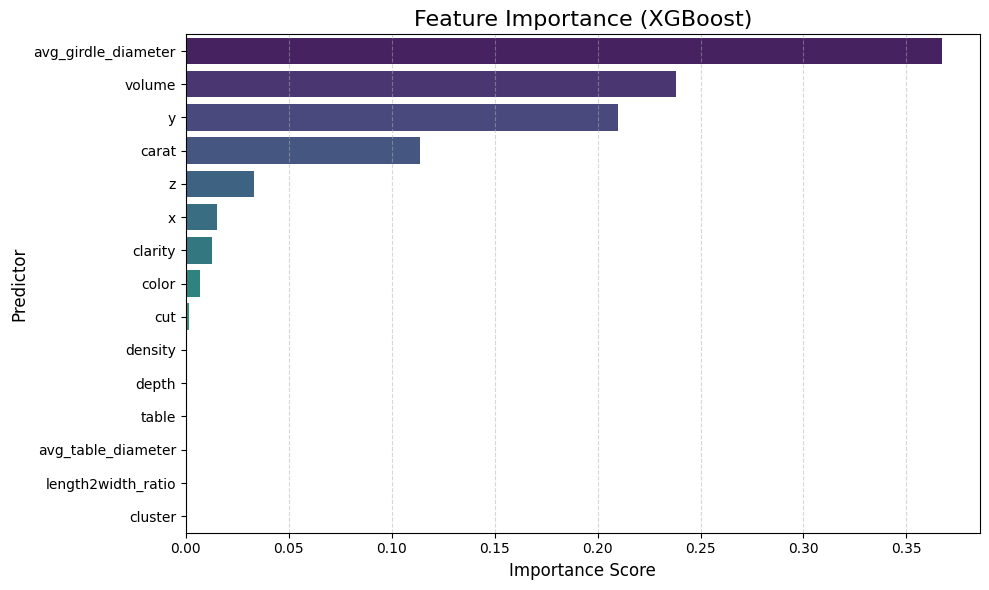

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb





# --- 3. Fit the XGBoost Model ---
print("Fitting XGBoost model on original features...")

# Using your optimal hyperparameters
model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train)

# --- 4. Generate the Plot ---
# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
})

# Sort the data so the most important features are at the top
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn for a cleaner look
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

plt.title('Feature Importance (XGBoost)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Predictor', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Partial Dependace plot

Fitting XGBoost model...
Generating Partial Dependence Plots for all features...


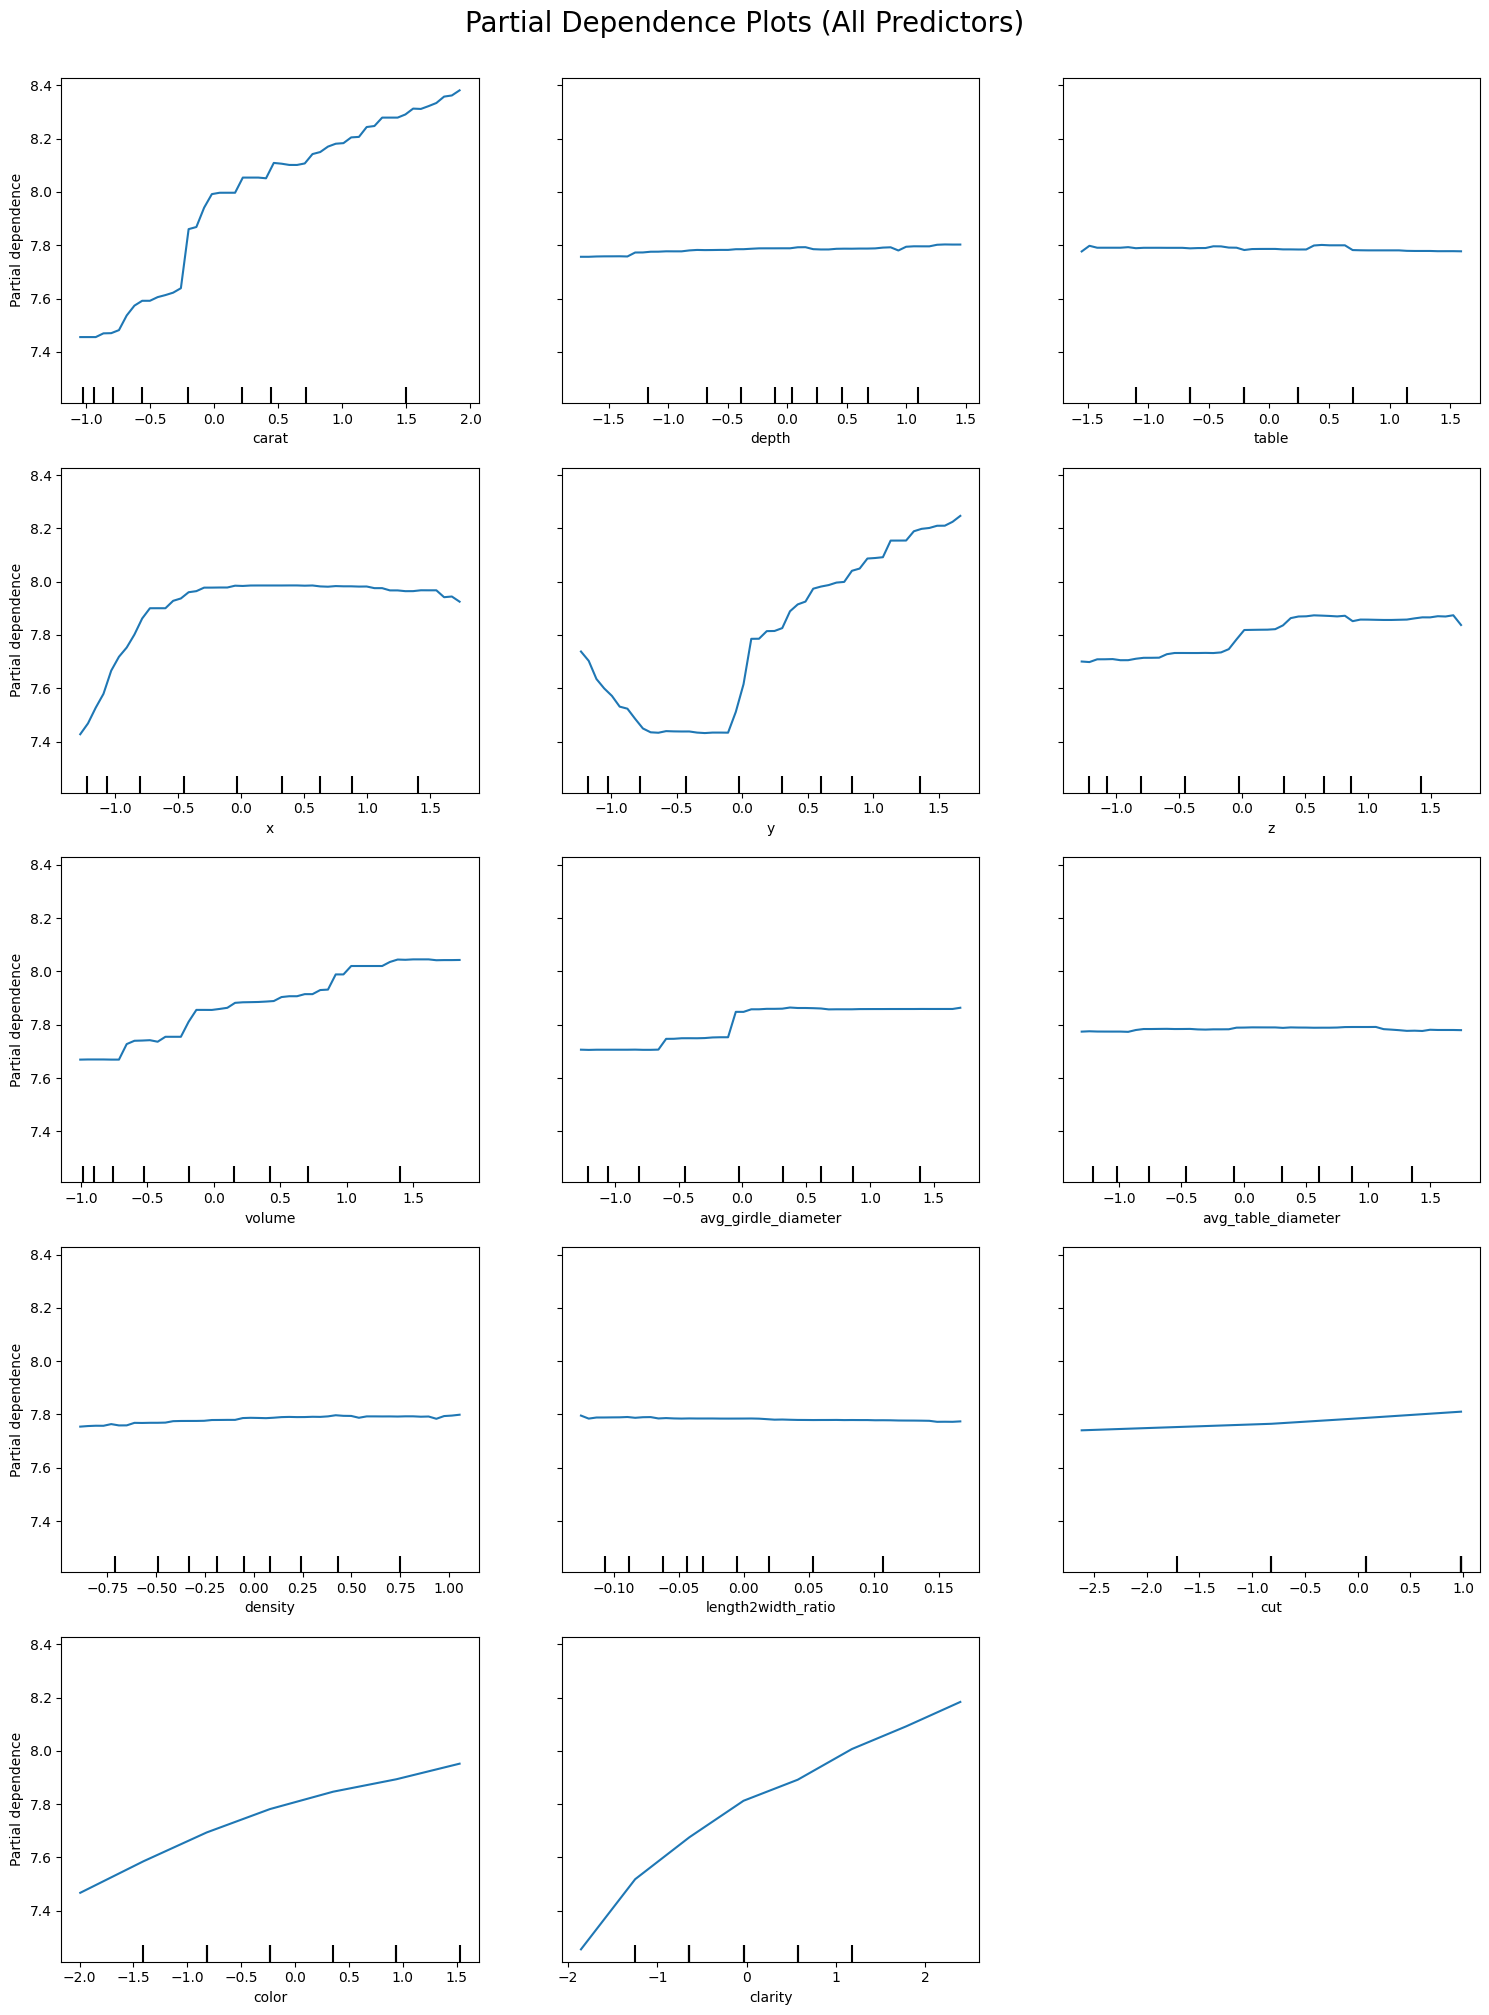

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.inspection import PartialDependenceDisplay



# !!! IMPORTANT: Ensure y_train is loaded !!!
# Replace this with your actual target data
# y_train = pd.read_csv('y_train.csv') 

# Remove 'cluster' if it exists to analyze original features only
if 'cluster' in X_train.columns:
    X_train = X_train.drop(columns=['cluster'])

# --- 2. Fit the XGBoost Model ---
print("Fitting XGBoost model...")
# Using your optimal hyperparameters
model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train)

# --- 3. Generate Partial Dependency Plots for ALL Variables ---
print("Generating Partial Dependence Plots for all features...")

# Get list of all features
all_features = X_train.columns.tolist()

# Determine grid size
# We'll use 3 columns, and calculate necessary rows
n_cols = 3
n_features = len(all_features)
n_rows = (n_features // n_cols) + (1 if n_features % n_cols > 0 else 0)

# Create a large figure to accommodate all plots
fig, ax = plt.subplots(figsize=(15, 4 * n_rows)) # Adjust height based on rows

display = PartialDependenceDisplay.from_estimator(
    estimator=model,
    X=X_train,
    features=all_features,
    kind="average",        # Show the average effect
    n_cols=n_cols,         # Arrange in 3 columns
    n_jobs=3,              # Parallel processing
    grid_resolution=50,    # Smoothness of the line
    ax=ax
)

plt.suptitle("Partial Dependence Plots (All Predictors)", fontsize=20, y=1.005)
plt.tight_layout()
plt.show()

learning curve

Generating Learning Curves for XGBoost...
(This may take a minute because XGBoost is computationally heavy...)


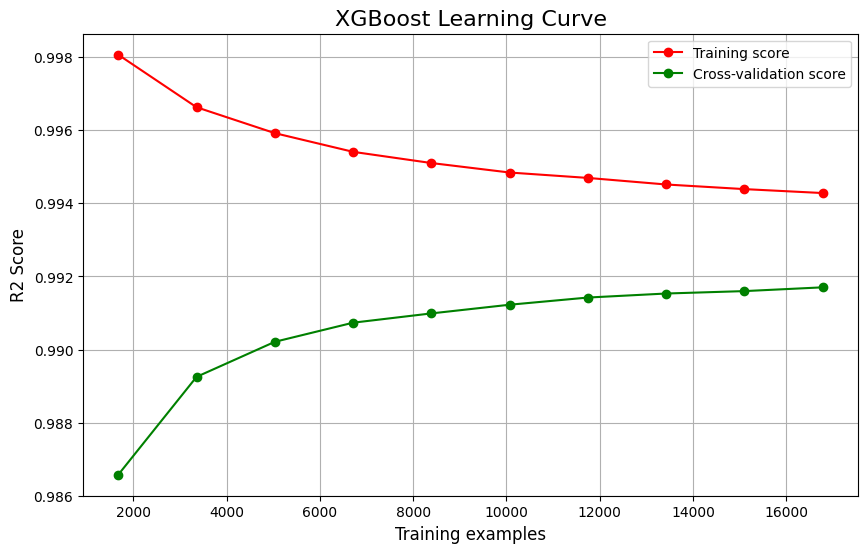

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, ShuffleSplit
from xgboost import XGBRegressor  # Make sure you have this import

# --- 1. Define your XGBoost Model ---
# Ensure you use the same params you found earlier (or default ones)
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# --- 2. Setup Learning Curve Parameters ---
print("Generating Learning Curves for XGBoost...")
print("(This may take a minute because XGBoost is computationally heavy...)")

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# IMPORTANT: Reduced '50' to '10' to save computation time.
train_sizes, train_scores, test_scores = learning_curve(
    model, 
    X_train_encoded, # Use your ENCODED/NUMERIC training data here
    y_train, 
    cv=cv, 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), # 10 steps from 10% to 100%
    scoring='r2'
)

# --- 3. Calculate Means ---
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# --- 4. Plot ---
plt.figure(figsize=(10, 6))

# Plot the training scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the cross-validation scores
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("XGBoost Learning Curve", fontsize=16)
plt.xlabel("Training examples", fontsize=12)
plt.ylabel("R2 Score", fontsize=12)
plt.legend(loc="best")
plt.grid(True)
plt.show()

Dropped 'cluster' from Test set.

STARTING HYPERPARAMETER TUNING...
Processing: Linear Regression...
  -> RMSE: 0.1407, R2: 0.9808
Processing: Ridge...
  -> RMSE: 0.1407, R2: 0.9808
Processing: Lasso...
  -> RMSE: 0.1414, R2: 0.9806
Processing: Decision Tree...
  -> RMSE: 0.1238, R2: 0.9851
Processing: Random Forest...
  -> RMSE: 0.0967, R2: 0.9909
Processing: Gradient Boosting...
  -> RMSE: 0.0985, R2: 0.9906
Processing: XGBoost...
  -> RMSE: 0.0901, R2: 0.9921

=== FINAL MODEL COMPARISON (Sorted by Performance) ===


,Model,RMSE,R2 Score
6,XGBoost,0.090110,0.992107
4,Random Forest,0.096670,0.990916
5,Gradient Boosting,0.098528,0.990564
3,Decision Tree,0.123836,0.985094
1,Ridge,0.140654,0.980770
0,Linear Regression,0.140656,0.980770
2,Lasso,0.141392,0.980568


C:\Users\Imesh\AppData\Local\Temp\ipykernel_7024\73194865.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='R2 Score', y='Model', palette='viridis')


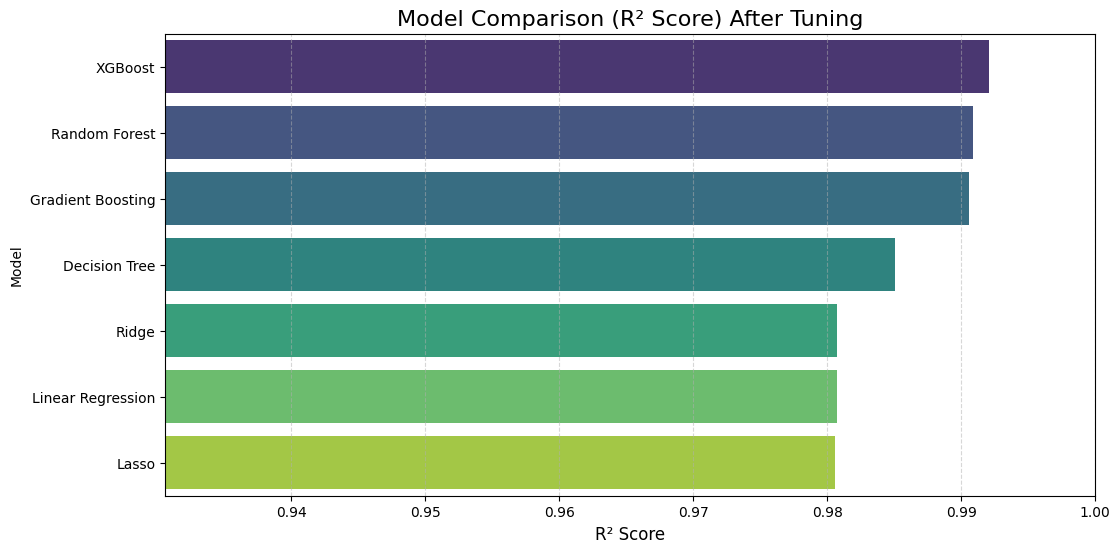


Detailed Best Parameters:
Linear Regression: {}
Ridge: {'alpha': 10}
Lasso: {'alpha': 0.001}
Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Random Forest: {'max_depth': 20, 'n_estimators': 100}
Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 200}
XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Fix for the 'display' error

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Import Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# ---------------------------------------------------------
# 1. SAFETY CLEAN-UP: Prepare Data
# ---------------------------------------------------------
# Create copies to protect original data
X_train_tuning = X_train.copy()
X_test_tuning = X_test.copy()

# Remove 'cluster' column if it exists (models expect numeric features only)
if 'cluster' in X_train_tuning.columns:
    X_train_tuning = X_train_tuning.drop(columns=['cluster'])
    print("Dropped 'cluster' from Training set.")

if 'cluster' in X_test_tuning.columns:
    X_test_tuning = X_test_tuning.drop(columns=['cluster'])
    print("Dropped 'cluster' from Test set.")

# ---------------------------------------------------------
# 2. Setup Models & Hyperparameter Grids
# ---------------------------------------------------------
models_config = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {} 
    },
    'Ridge': {
        'model': Ridge(),
        'params': { 'alpha': [0.01, 0.1, 1, 10, 100] }
    },
    'Lasso': {
        'model': Lasso(max_iter=10000), 
        'params': { 'alpha': [0.001, 0.01, 0.1, 1, 10] }
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100], 
            'max_depth': [None, 10, 20]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    }
}

# ---------------------------------------------------------
# 3. Loop: Tune, Fit, Evaluate
# ---------------------------------------------------------
results_list = []
best_models = {}

print("\nSTARTING HYPERPARAMETER TUNING...")
print("="*60)

for name, config in models_config.items():
    print(f"Processing: {name}...")
    
    # Grid Search
    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    # Fit on the CLEAN Training Data
    grid.fit(X_train_tuning, y_train)
    
    # Get Best Model
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    best_models[name] = best_model
    
    # Predict on the CLEAN Test Data
    y_pred = best_model.predict(X_test_tuning)
    
    # Calculate Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store Results
    results_list.append({
        'Model': name,
        'RMSE': rmse,
        'R2 Score': r2,
        'Best Params': str(best_params)
    })
    
    print(f"  -> RMSE: {rmse:.4f}, R2: {r2:.4f}")

# ---------------------------------------------------------
# 4. Present Results (Safe Display)
# ---------------------------------------------------------
results_df = pd.DataFrame(results_list).sort_values(by='R2 Score', ascending=False)

print("\n=== FINAL MODEL COMPARISON (Sorted by Performance) ===")
try:
    display(results_df[['Model', 'RMSE', 'R2 Score']])
except:
    print(results_df[['Model', 'RMSE', 'R2 Score']])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='R2 Score', y='Model', palette='viridis')
plt.title('Model Comparison (R² Score) After Tuning', fontsize=16)
plt.xlabel('R² Score', fontsize=12)
plt.xlim(min(results_df['R2 Score']) - 0.05, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

print("\nDetailed Best Parameters:")
for row in results_list:
    print(f"{row['Model']}: {row['Best Params']}")


STARTING TUNING (Added PLS & Elastic Net)...
Processing: Linear Regression...
  -> RMSE: 0.1407, R2: 0.9808
Processing: Ridge...
  -> RMSE: 0.1407, R2: 0.9808
Processing: Lasso...
  -> RMSE: 0.1414, R2: 0.9806
Processing: Elastic Net...
  -> RMSE: 0.1409, R2: 0.9807
Processing: PLS Regression...
  -> RMSE: 0.1410, R2: 0.9807
Processing: Decision Tree...
  -> RMSE: 0.1238, R2: 0.9851
Processing: Random Forest...
  -> RMSE: 0.0967, R2: 0.9909
Processing: Gradient Boosting...
  -> RMSE: 0.0985, R2: 0.9906
Processing: XGBoost...
  -> RMSE: 0.0901, R2: 0.9921

=== FINAL MODEL COMPARISON ===


,Model,RMSE,R2 Score
8,XGBoost,0.090110,0.992107
6,Random Forest,0.096670,0.990916
7,Gradient Boosting,0.098528,0.990564
5,Decision Tree,0.123836,0.985094
1,Ridge,0.140654,0.980770
0,Linear Regression,0.140656,0.980770
3,Elastic Net,0.140876,0.980709
4,PLS Regression,0.141039,0.980665
2,Lasso,0.141392,0.980568


C:\Users\Imesh\AppData\Local\Temp\ipykernel_7024\1871675212.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='R2 Score', y='Model', palette='viridis')


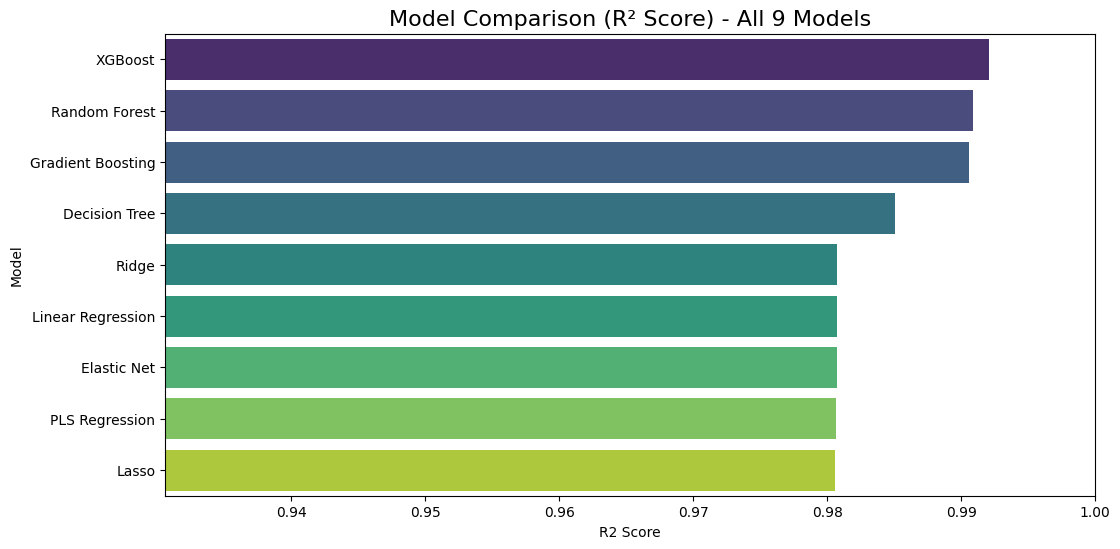

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Import Standard Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Import PLS
from sklearn.cross_decomposition import PLSRegression

# ---------------------------------------------------------
# 1. SAFETY CLEAN-UP: Prepare Data
# ---------------------------------------------------------
X_train_tuning = X_train.copy()
X_test_tuning = X_test.copy()

# Remove 'cluster' column if it exists
if 'cluster' in X_train_tuning.columns:
    X_train_tuning = X_train_tuning.drop(columns=['cluster'])
if 'cluster' in X_test_tuning.columns:
    X_test_tuning = X_test_tuning.drop(columns=['cluster'])

# ---------------------------------------------------------
# 2. Setup Models & Hyperparameter Grids
# ---------------------------------------------------------
models_config = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {} 
    },
    'Ridge': {
        'model': Ridge(),
        'params': { 'alpha': [0.01, 0.1, 1, 10, 100] }
    },
    'Lasso': {
        'model': Lasso(max_iter=10000), 
        'params': { 'alpha': [0.001, 0.01, 0.1, 1, 10] }
    },
    # --- NEW: Elastic Net ---
    'Elastic Net': {
        'model': ElasticNet(max_iter=10000),
        'params': {
            'alpha': [0.001, 0.01, 0.1, 1, 10],
            'l1_ratio': [0.1, 0.5, 0.9] # 0.1=Ridge-like, 0.9=Lasso-like
        }
    },
    # --- NEW: PLS Regression ---
    'PLS Regression': {
        'model': PLSRegression(),
        'params': {
            'n_components': [2, 4, 6, 8, 10] # Adjust if you have fewer features
        }
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100], 
            'max_depth': [None, 10, 20]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    }
}

# ---------------------------------------------------------
# 3. Loop: Tune, Fit, Evaluate
# ---------------------------------------------------------
results_list = []
best_models = {}

print("\nSTARTING TUNING (Added PLS & Elastic Net)...")
print("="*60)

for name, config in models_config.items():
    print(f"Processing: {name}...")
    
    # Grid Search
    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    try:
        # Fit
        grid.fit(X_train_tuning, y_train)
        
        # Best Model
        best_model = grid.best_estimator_
        best_models[name] = best_model
        best_params = grid.best_params_
        
        # Predict
        y_pred = best_model.predict(X_test_tuning)
        
        # PLS predict returns shape (n, 1), flatten it just in case
        if y_pred.ndim > 1:
            y_pred = y_pred.ravel()

        # Metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        results_list.append({
            'Model': name,
            'RMSE': rmse,
            'R2 Score': r2,
            'Best Params': str(best_params)
        })
        print(f"  -> RMSE: {rmse:.4f}, R2: {r2:.4f}")
        
    except Exception as e:
        print(f"  -> Failed: {e}")

# ---------------------------------------------------------
# 4. Results
# ---------------------------------------------------------
results_df = pd.DataFrame(results_list).sort_values(by='R2 Score', ascending=False)

print("\n=== FINAL MODEL COMPARISON ===")
try:
    display(results_df[['Model', 'RMSE', 'R2 Score']])
except:
    print(results_df[['Model', 'RMSE', 'R2 Score']])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='R2 Score', y='Model', palette='viridis')
plt.title('Model Comparison (R² Score) - All 9 Models', fontsize=16)
plt.xlim(min(results_df['R2 Score']) - 0.05, 1.0)
plt.show()

Model                | Train R2   | Test R2    | Status
-----------------------------------------------------------------
Linear Regression    | 0.9810     | 0.9808     | Good
Ridge                | 0.9810     | 0.9808     | Good
Lasso                | 0.9808     | 0.9806     | Good
Elastic Net          | 0.9809     | 0.9807     | Good
PLS Regression       | 0.9804     | 0.9802     | Good
Decision Tree        | 0.9901     | 0.9851     | Good
Random Forest        | 0.9987     | 0.9909     | Good
Gradient Boosting    | 0.9916     | 0.9906     | Good
XGBoost              | 0.9940     | 0.9921     | Good

=== DETAILED COMPARISON ===


,Model,Train R2,Test R2,Train RMSE,Test RMSE
8,XGBoost,0.994038,0.992107,0.078757,0.090110
6,Random Forest,0.998740,0.990916,0.036207,0.096670
7,Gradient Boosting,0.991649,0.990564,0.093209,0.098528
5,Decision Tree,0.990091,0.985094,0.101528,0.123836
1,Ridge,0.980968,0.980770,0.140710,0.140654
0,Linear Regression,0.981009,0.980770,0.140560,0.140656
3,Elastic Net,0.980904,0.980709,0.140946,0.140876
2,Lasso,0.980799,0.980568,0.141333,0.141392
4,PLS Regression,0.980362,0.980173,0.142932,0.142821


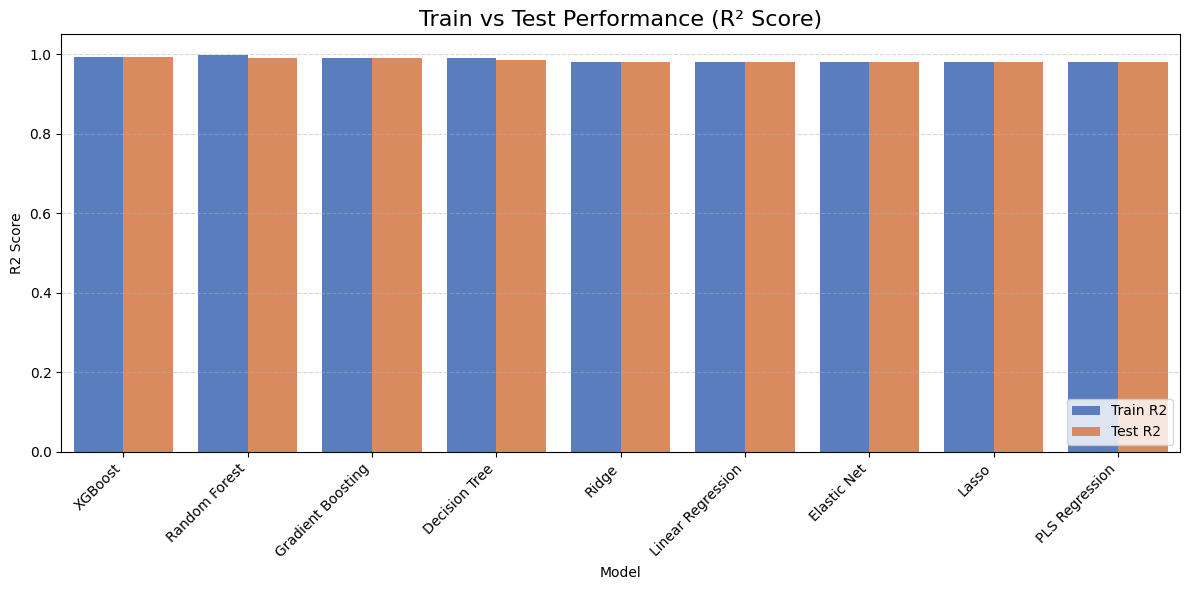

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Import Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# ---------------------------------------------------------
# 1. Prepare Data (Clean Copies)
# ---------------------------------------------------------
X_train_tuning = X_train.copy()
X_test_tuning = X_test.copy()

# Remove 'cluster' if present
if 'cluster' in X_train_tuning.columns:
    X_train_tuning = X_train_tuning.drop(columns=['cluster'])
if 'cluster' in X_test_tuning.columns:
    X_test_tuning = X_test_tuning.drop(columns=['cluster'])

# ---------------------------------------------------------
# 2. Configure Models
# ---------------------------------------------------------
models_config = {
    'Linear Regression': { 'model': LinearRegression(), 'params': {} },
    'Ridge': { 'model': Ridge(), 'params': {'alpha': [0.01, 0.1, 1, 10]} },
    'Lasso': { 'model': Lasso(max_iter=10000), 'params': {'alpha': [0.001, 0.01, 0.1, 1]} },
    'Elastic Net': { 'model': ElasticNet(max_iter=10000), 'params': {'alpha': [0.001, 0.01, 0.1], 'l1_ratio': [0.1, 0.5, 0.9]} },
    'PLS Regression': { 'model': PLSRegression(), 'params': {'n_components': [2, 4, 6, 8]} },
    'Decision Tree': { 'model': DecisionTreeRegressor(random_state=42), 'params': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 10]} },
    'Random Forest': { 'model': RandomForestRegressor(random_state=42), 'params': {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]} },
    'Gradient Boosting': { 'model': GradientBoostingRegressor(random_state=42), 'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]} },
    'XGBoost': { 'model': XGBRegressor(random_state=42, n_jobs=-1), 'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]} }
}

# ---------------------------------------------------------
# 3. Tuning Loop
# ---------------------------------------------------------
comparison_list = []

print(f"{'Model':<20} | {'Train R2':<10} | {'Test R2':<10} | {'Status'}")
print("-" * 65)

for name, config in models_config.items():
    
    # Grid Search
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='r2', n_jobs=-1)
    
    try:
        # Fit
        grid.fit(X_train_tuning, y_train)
        best_model = grid.best_estimator_
        
        # Predict on TRAIN
        y_train_pred = best_model.predict(X_train_tuning)
        if y_train_pred.ndim > 1: y_train_pred = y_train_pred.ravel()
        
        # Predict on TEST
        y_test_pred = best_model.predict(X_test_tuning)
        if y_test_pred.ndim > 1: y_test_pred = y_test_pred.ravel()
        
        # Metrics
        r2_train = r2_score(y_train, y_train_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        
        r2_test = r2_score(y_test, y_test_pred)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        
        # Check Overfitting (Difference > 5%)
        status = "Overfitting" if (r2_train - r2_test) > 0.05 else "Good"
        
        print(f"{name:<20} | {r2_train:.4f}     | {r2_test:.4f}     | {status}")
        
        comparison_list.append({
            'Model': name,
            'Train R2': r2_train,
            'Test R2': r2_test,
            'Train RMSE': rmse_train,
            'Test RMSE': rmse_test,
            'Best Params': str(grid.best_params_)
        })
        
    except Exception as e:
        print(f"{name:<20} | FAILED: {e}")

# ---------------------------------------------------------
# 4. Visualization
# ---------------------------------------------------------
df_results = pd.DataFrame(comparison_list).sort_values(by='Test R2', ascending=False)

# Display Table
print("\n=== DETAILED COMPARISON ===")
display(df_results[['Model', 'Train R2', 'Test R2', 'Train RMSE', 'Test RMSE']])

# Reshape for Plotting
df_melted = df_results.melt(id_vars='Model', value_vars=['Train R2', 'Test R2'], var_name='Dataset', value_name='R2 Score')

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='R2 Score', hue='Dataset', palette='muted')
plt.title('Train vs Test Performance (R² Score)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Model                | Train R2   | Test R2    | Status       | Best Hyperparameters
--------------------------------------------------------------------------------------------------------------
Linear Regression    | 0.9810     | 0.9808     | Good         | {}
Ridge                | 0.9810     | 0.9808     | Good         | {'alpha': 10}
Lasso                | 0.9808     | 0.9806     | Good         | {'alpha': 0.001}
Elastic Net          | 0.9809     | 0.9807     | Good         | {'alpha': 0.001, 'l1_ratio': 0.1}
PLS Regression       | 0.9804     | 0.9802     | Good         | {'n_components': 8}
Decision Tree        | 0.9901     | 0.9851     | Good         | {'max_depth': 10, 'min_samples_split': 10}
Random Forest        | 0.9987     | 0.9909     | Good         | {'max_depth': 20, 'n_estimators': 100}
Gradient Boosting    | 0.9916     | 0.9906     | Good         | {'learning_rate': 0.1, 'n_estimators': 200}
XGBoost              | 0.9940     | 0.9921     | Good         | {'learning_rat

,Model,Train R2,Test R2,Train RMSE,Test RMSE,Best Params
8,XGBoost,0.994038,0.992107,0.078757,0.090110,"{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}"
6,Random Forest,0.998740,0.990916,0.036207,0.096670,"{'max_depth': 20, 'n_estimators': 100}"
7,Gradient Boosting,0.991649,0.990564,0.093209,0.098528,"{'learning_rate': 0.1, 'n_estimators': 200}"
5,Decision Tree,0.990091,0.985094,0.101528,0.123836,"{'max_depth': 10, 'min_samples_split': 10}"
1,Ridge,0.980968,0.980770,0.140710,0.140654,{'alpha': 10}
0,Linear Regression,0.981009,0.980770,0.140560,0.140656,{}
3,Elastic Net,0.980904,0.980709,0.140946,0.140876,"{'alpha': 0.001, 'l1_ratio': 0.1}"
2,Lasso,0.980799,0.980568,0.141333,0.141392,{'alpha': 0.001}
4,PLS Regression,0.980362,0.980173,0.142932,0.142821,{'n_components': 8}


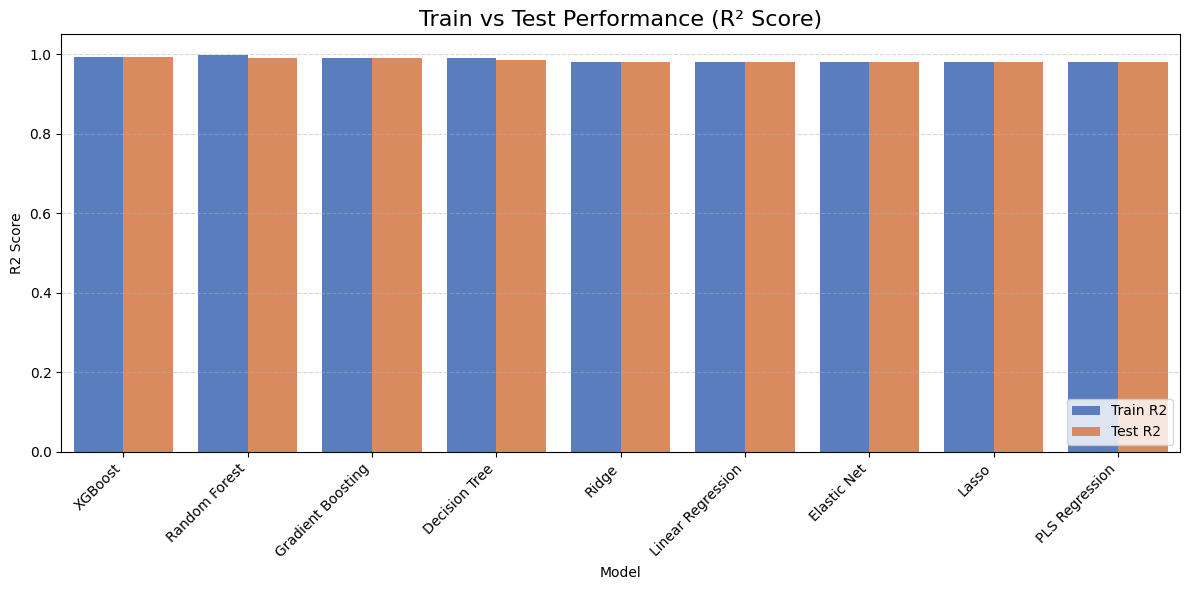

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Import Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# ---------------------------------------------------------
# 1. Prepare Data (Clean Copies)
# ---------------------------------------------------------
X_train_tuning = X_train.copy()
X_test_tuning = X_test.copy()

# Remove 'cluster' if present
if 'cluster' in X_train_tuning.columns:
    X_train_tuning = X_train_tuning.drop(columns=['cluster'])
if 'cluster' in X_test_tuning.columns:
    X_test_tuning = X_test_tuning.drop(columns=['cluster'])

# ---------------------------------------------------------
# 2. Configure Models
# ---------------------------------------------------------
models_config = {
    'Linear Regression': { 'model': LinearRegression(), 'params': {} },
    'Ridge': { 'model': Ridge(), 'params': {'alpha': [0.01, 0.1, 1, 10]} },
    'Lasso': { 'model': Lasso(max_iter=10000), 'params': {'alpha': [0.001, 0.01, 0.1, 1]} },
    'Elastic Net': { 'model': ElasticNet(max_iter=10000), 'params': {'alpha': [0.001, 0.01, 0.1], 'l1_ratio': [0.1, 0.5, 0.9]} },
    'PLS Regression': { 'model': PLSRegression(), 'params': {'n_components': [2, 4, 6, 8]} },
    'Decision Tree': { 'model': DecisionTreeRegressor(random_state=42), 'params': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 10]} },
    'Random Forest': { 'model': RandomForestRegressor(random_state=42), 'params': {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]} },
    'Gradient Boosting': { 'model': GradientBoostingRegressor(random_state=42), 'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]} },
    'XGBoost': { 'model': XGBRegressor(random_state=42, n_jobs=-1), 'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]} }
}

# ---------------------------------------------------------
# 3. Tuning Loop
# ---------------------------------------------------------
comparison_list = []

# Updated header to include Best Params
print(f"{'Model':<20} | {'Train R2':<10} | {'Test R2':<10} | {'Status':<12} | {'Best Hyperparameters'}")
print("-" * 110)

for name, config in models_config.items():
    
    # Grid Search
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='r2', n_jobs=-1)
    
    try:
        # Fit
        grid.fit(X_train_tuning, y_train)
        best_model = grid.best_estimator_
        
        # Predict on TRAIN
        y_train_pred = best_model.predict(X_train_tuning)
        if y_train_pred.ndim > 1: y_train_pred = y_train_pred.ravel()
        
        # Predict on TEST
        y_test_pred = best_model.predict(X_test_tuning)
        if y_test_pred.ndim > 1: y_test_pred = y_test_pred.ravel()
        
        # Metrics
        r2_train = r2_score(y_train, y_train_pred)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        
        r2_test = r2_score(y_test, y_test_pred)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        
        # Check Overfitting (Difference > 5%)
        status = "Overfitting" if (r2_train - r2_test) > 0.05 else "Good"
        
        # Print metrics AND Best Params
        print(f"{name:<20} | {r2_train:.4f}     | {r2_test:.4f}     | {status:<12} | {grid.best_params_}")
        
        comparison_list.append({
            'Model': name,
            'Train R2': r2_train,
            'Test R2': r2_test,
            'Train RMSE': rmse_train,
            'Test RMSE': rmse_test,
            'Best Params': grid.best_params_ # Store as dict object or string
        })
        
    except Exception as e:
        print(f"{name:<20} | FAILED: {e}")

# ---------------------------------------------------------
# 4. Visualization
# ---------------------------------------------------------
df_results = pd.DataFrame(comparison_list).sort_values(by='Test R2', ascending=False)

# Display Table (Added 'Best Params' to display list)
print("\n=== DETAILED COMPARISON ===")
pd.set_option('display.max_colwidth', None) # Ensure params aren't truncated
display(df_results[['Model', 'Train R2', 'Test R2', 'Train RMSE', 'Test RMSE', 'Best Params']])

# Reshape for Plotting
df_melted = df_results.melt(id_vars='Model', value_vars=['Train R2', 'Test R2'], var_name='Dataset', value_name='R2 Score')

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='R2 Score', hue='Dataset', palette='muted')
plt.title('Train vs Test Performance (R² Score)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()